# YouTube Channel Analytics: 
Impact of Upload Timing on Viewer Engagement and Channel Growth

## Introduction
This notebook aims to analyze the impact of video upload timing on viewer engagement and channel growth for multiple YouTube channels. The analysis involves data preprocessing, exploratory data analysis (EDA), feature engineering, and visualizations to uncover trends and insights.

In [3]:
# We import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data
We load the data from a CSV file into a Pandas DataFrame for further analysis.

In [5]:
# Load the dataset
df = pd.read_csv('all_channels_video_data1.csv')

# Display the shape and the first few rows of the DataFrame
print(df.shape)
df.head()

(5003, 9)


,channel_name,Title,Video_id,Published_date,Month,Views,Likes,Comments,Duration
0,John John Florence,POWER TIGER / Pyzel & John John Board Talk,QJlZlJ8RyCM,2024-07-26 19:41:43+00:00,Jul,34568,877,54,0 days 00:10:40
1,John John Florence,Raw Clips -- LATE SEASON BACKDOOR,ULTzb5MUvT0,2024-06-17 20:33:25+00:00,Jun,71110,1490,93,0 days 00:10:09
2,John John Florence,Is Winning the End Goal? Full video on my channel,y30Ujck0AXA,2024-06-13 21:38:56+00:00,Jun,7261,399,18,0 days 00:00:49
3,John John Florence,On the Process of Competing,4VO3JBohPug,2024-06-13 21:07:38+00:00,Jun,48366,1818,117,0 days 00:02:14
4,John John Florence,Today's Notes - raw clips John & Ivan,0YwEIm-N1Ac,2024-05-17 00:09:01+00:00,May,85742,1795,139,0 days 00:11:53


## Initial Data Inspection
Before making any changes to the data, we need to understand its structure. This involves checking for missing values, duplicates, and the data types of each column.

In [7]:
# Check for missing values and duplicates
print(df.isna().any())

print('----------------')
print(df.duplicated().sum())

print('----------------')
# Display data types of each column
df.dtypes


channel_name      False
Title             False
Video_id          False
Published_date    False
Month             False
Views             False
Likes             False
Comments          False
Duration          False
dtype: bool
----------------
0
----------------


channel_name      object
Title             object
Video_id          object
Published_date    object
Month             object
Views              int64
Likes              int64
Comments           int64
Duration          object
dtype: object

## Data Preprocessing

**Renaming Columns**

To standardize column names, we rename channel_name to Channel_name.

In [10]:
df.rename(columns={'channel_name': 'Channel_name'}, inplace=True)

**Handling Missing Values and Duplicates**

In [12]:
df.drop_duplicates(inplace=True)

**Converting Data Types**

We convert relevant columns to their appropriate data types for further analysis.

In [15]:
# Convert Published_date to datetime
df['Published_date'] = pd.to_datetime(df['Published_date'])

# Verify the conversion
df.dtypes

Channel_name                   object
Title                          object
Video_id                       object
Published_date    datetime64[ns, UTC]
Month                          object
Views                           int64
Likes                           int64
Comments                        int64
Duration                       object
dtype: object

## Feature Engineering
**Creating New Features**


We create new features such as Day_of_week and Duration_seconds to facilitate analysis.

In [18]:
# Extract the day of the week from Published_date
df['Day_of_week'] = df['Published_date'].dt.day_name()

# Convert Duration to seconds
df['Duration_seconds'] = pd.to_timedelta(df['Duration']).dt.total_seconds()

# Display the updated DataFrame
df.head()


,Channel_name,Title,Video_id,Published_date,Month,Views,Likes,Comments,Duration,Day_of_week,Duration_seconds
0,John John Florence,POWER TIGER / Pyzel & John John Board Talk,QJlZlJ8RyCM,2024-07-26 19:41:43+00:00,Jul,34568,877,54,0 days 00:10:40,Friday,640.0
1,John John Florence,Raw Clips -- LATE SEASON BACKDOOR,ULTzb5MUvT0,2024-06-17 20:33:25+00:00,Jun,71110,1490,93,0 days 00:10:09,Monday,609.0
2,John John Florence,Is Winning the End Goal? Full video on my channel,y30Ujck0AXA,2024-06-13 21:38:56+00:00,Jun,7261,399,18,0 days 00:00:49,Thursday,49.0
3,John John Florence,On the Process of Competing,4VO3JBohPug,2024-06-13 21:07:38+00:00,Jun,48366,1818,117,0 days 00:02:14,Thursday,134.0
4,John John Florence,Today's Notes - raw clips John & Ivan,0YwEIm-N1Ac,2024-05-17 00:09:01+00:00,May,85742,1795,139,0 days 00:11:53,Friday,713.0


## Exploratory Data Analysis (EDA)
**Distribution of Upload Times and Engagement Metrics**

We analyze the distribution of video upload times and key engagement metrics to understand general trends in the data.

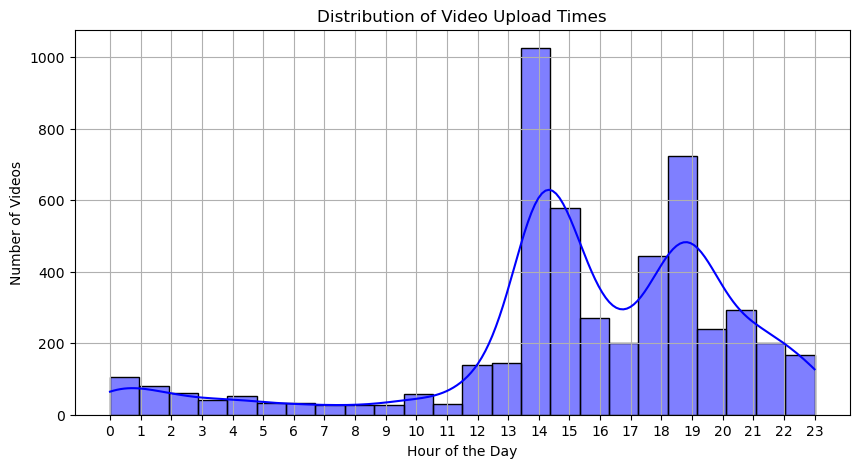

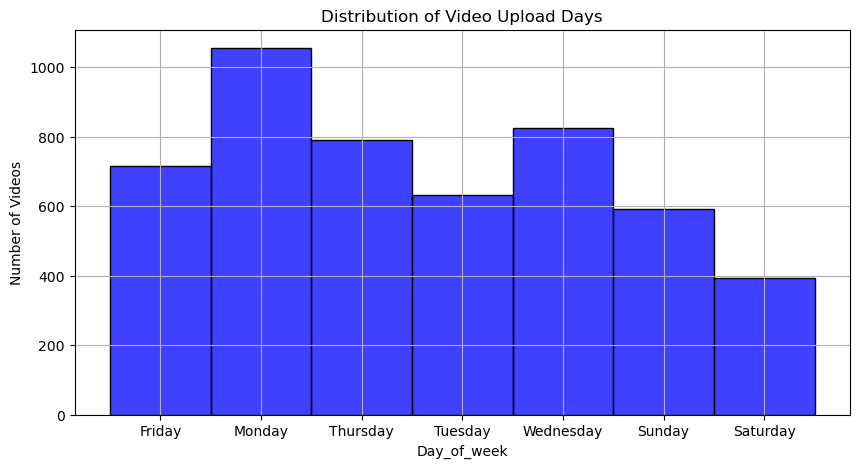

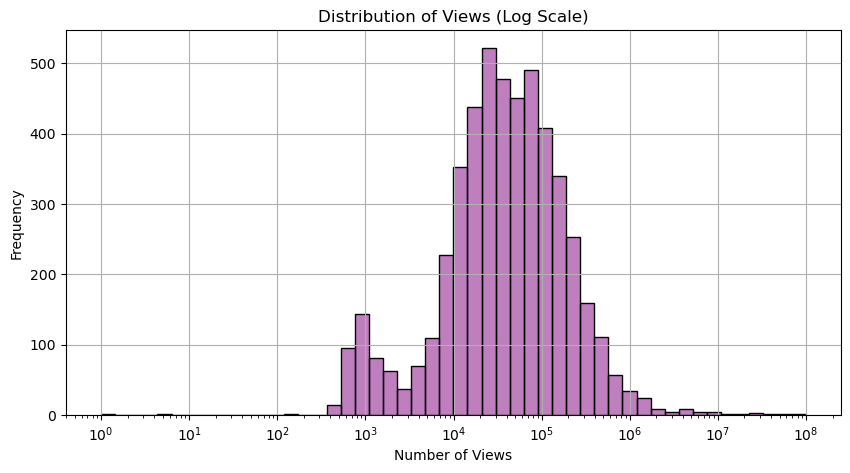

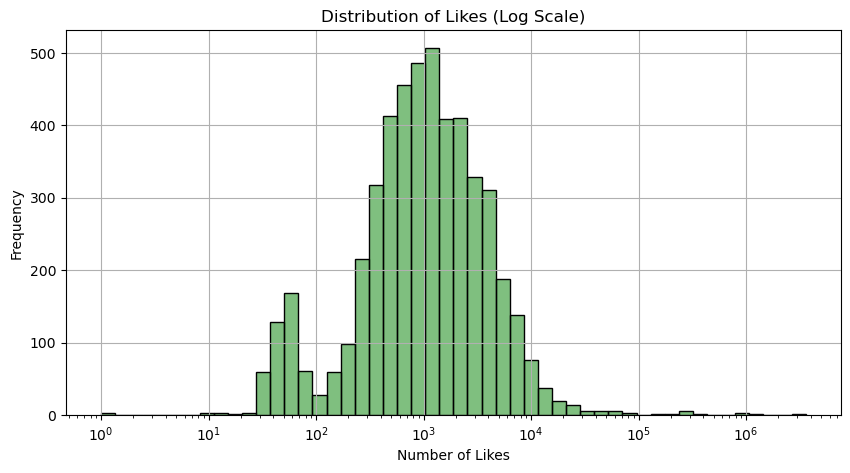

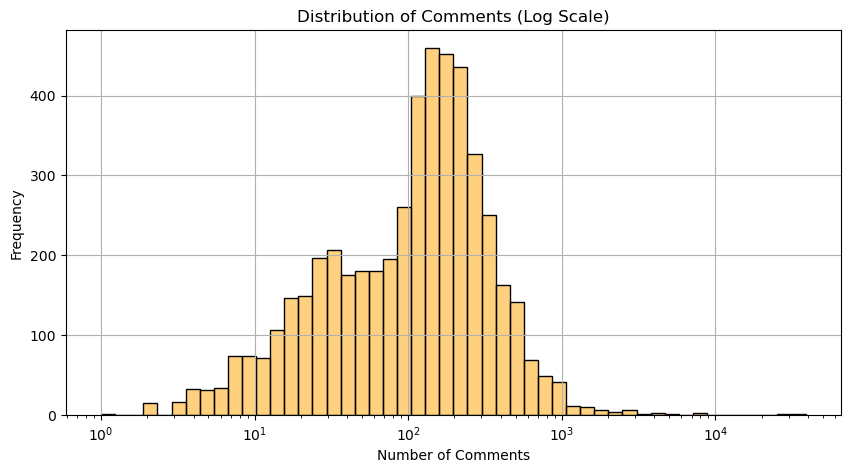

In [21]:
# Distribution of Video Upload Times
plt.figure(figsize=(10, 5))
sns.histplot(df['Published_date'].dt.hour, bins=24, kde=True, color='blue')
plt.title('Distribution of Video Upload Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Distribution of Video Upload Days
plt.figure(figsize=(10, 5))
sns.histplot(df['Day_of_week'], color='blue')
plt.title('Distribution of Video Upload Days')
plt.ylabel('Number of Videos')
plt.xticks(range(7))
plt.grid(True)
plt.show()

# Distribution of Views (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(df['Views'], bins=50, kde=True, color='purple', log_scale=True)
plt.title('Distribution of Views (Log Scale)')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Likes (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(df['Likes'], bins=50, kde=True, color='green', log_scale=True)
plt.title('Distribution of Likes (Log Scale)')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Comments (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(df['Comments'], bins=50, kde=True, color='orange', log_scale=True)
plt.title('Distribution of Comments (Log Scale)')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Correlation Analysis: Duration vs. Views**

We explore the relationship between video duration and views to identify any patterns.

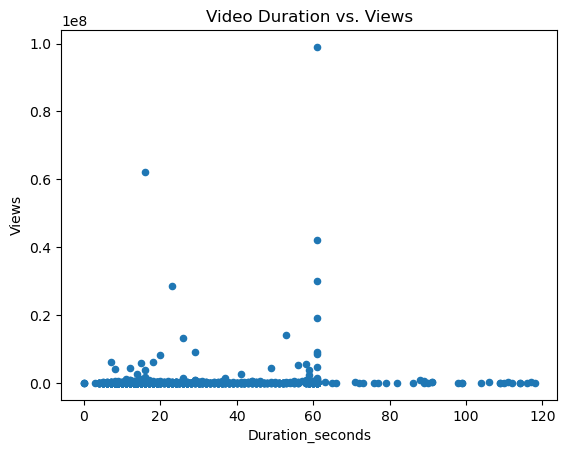

In [24]:
# Scatter plot for Duration vs. Views
df.query('Duration_seconds < 120').plot(kind='scatter',
        x='Duration_seconds',
        y='Views',
        title='Video Duration vs. Views')
plt.show()


## Advanced Feature Engineering

 **Creating a Channel_contribution Metric**

To better understand the overall impact of a video, we create a composite metric Channel_contribution that combines views, likes, and comments.

In [28]:
df['Channel_contribution'] = df['Views'] + df['Likes']*10 + df['Comments']*15

**Categorizing Upload Times by Part of the Day**

We categorize upload times into morning, afternoon, and evening to analyze the impact of upload timing.

In [31]:
def set_time_of_day(row):
    if (row['Published_date'].hour < 12) and (row['Published_date'].hour >= 0):
        return 'morning'
    elif (row['Published_date'].hour >= 12) and (row['Published_date'].hour < 18):
        return 'evening'
    return 'afternoon'

# Apply the function to create a new feature
df['Part_of_the_day'] = df.apply(set_time_of_day, axis=1)

**Visualizing Channel Contribution by Part of the Day**

We visualize the impact of upload timing on the Channel_contribution metric.

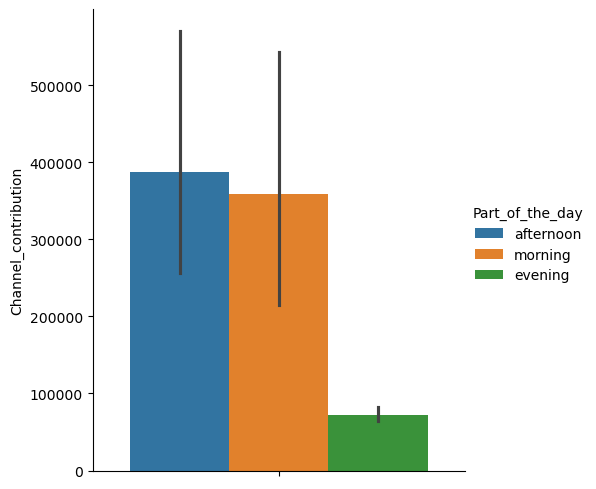

In [41]:
# Bar plot for Channel Contribution by Part of the Day
sns.catplot(y='Channel_contribution', hue='Part_of_the_day', data=df, kind='bar')
plt.show()


## Comparative Analysis

**Channel Contribution by Day of the Week**

We use a box plot to compare the distribution of Channel_contribution across different days of the week.

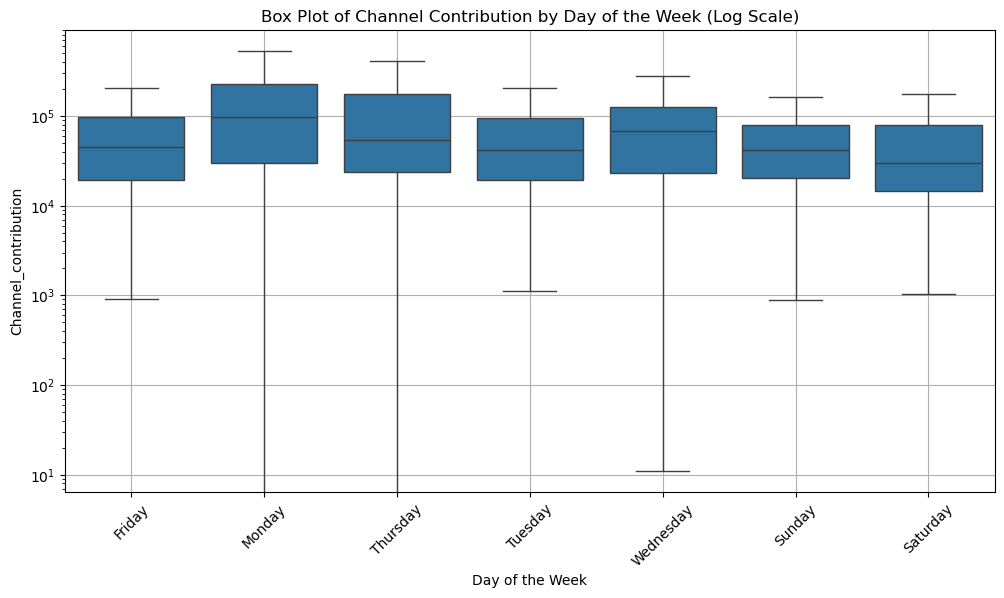

In [45]:
# Box Plot of Channel Contribution by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day_of_week', y='Channel_contribution', data=df, showfliers=False)
plt.yscale('log')
plt.title('Box Plot of Channel Contribution by Day of the Week (Log Scale)')
plt.xlabel('Day of the Week')
plt.ylabel('Channel_contribution')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Analyzing Average Views, Likes, and Comments**

We calculate and visualize the average views, likes, and comments for videos.

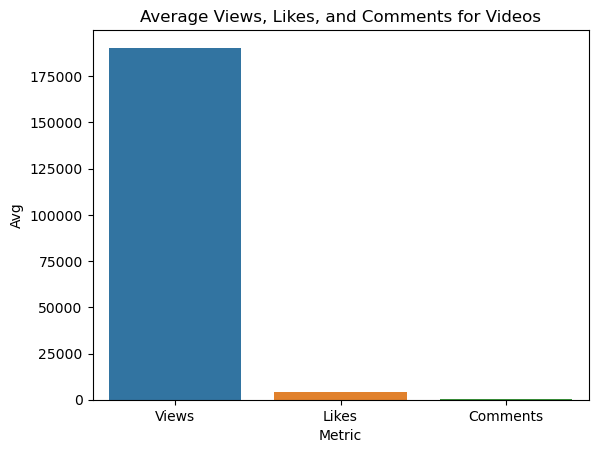

In [48]:
# Calculate the average views, likes, and comments
avg_s = df[['Views', 'Likes', 'Comments']].mean()

# Create a DataFrame for the averages
avg_df = pd.DataFrame({
    'Metric': avg_s.index,
    'Avg': avg_s.values
})

# Bar plot for average views, likes, and comments
sns.barplot(data=avg_df, x='Metric', y='Avg', hue='Metric')
plt.title('Average Views, Likes, and Comments for Videos')
plt.show()


## Trend Analysis


**Views Over Time by Channel**


We analyze the trend in views over time to identify patterns in channel growth.

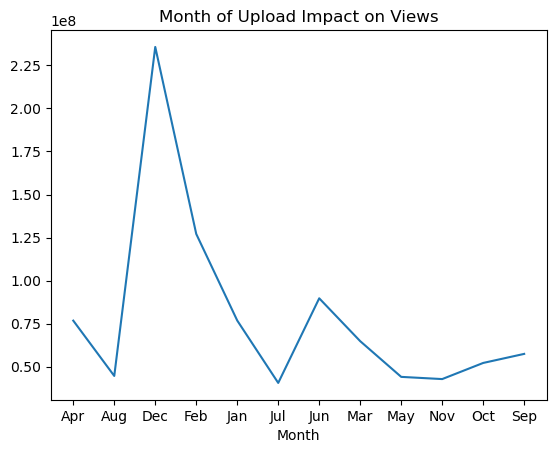

In [52]:
# Group views by the month of upload
monthly_upload_views = df.groupby('Month')['Views'].sum()

# Line plot for views over time by channel
sns.lineplot(x=monthly_upload_views.index, y=monthly_upload_views.values, sort=False)
plt.title("Month of Upload Impact on Views")
plt.show()


## Upload Gaps and Their Impact

**Calculating Upload Gaps**

We calculate the gaps between video uploads and analyze their impact on channel performance.



In [57]:
# Calculate upload gaps
df['Duration_minutes'] = df['Duration_seconds'] / 60
df_without_anomalies = df[(df['Duration_minutes'] < 80) & (df['Channel_contribution'] < 1.5 * 10000000)]

def get_upload_gaps(row1, row2):
    return row1['Published_date'] - row2['Published_date']

df_shifted = df.shift(-1)
df['Upload_gaps'] = df.apply(lambda row: get_upload_gaps(row, df_shifted.loc[row.name]), axis=1)

# Handle last video gap time
channels_last_video = df.groupby('Channel_name')['Published_date'].min()
channels_gap_median = df.groupby('Channel_name')['Upload_gaps'].median()
channels_last_vid_and_gap = pd.concat([channels_last_video, channels_gap_median], axis=1)

for index, row in channels_last_vid_and_gap.iterrows():
    mask = (df['Channel_name'] == index) & (df['Published_date'] == row['Published_date'])
    df.loc[mask, 'Upload_gaps'] = row['Upload_gaps']

# Check for negative gaps (anomalies)
(df['Upload_gaps'].dt.total_seconds() < 0).sum()


0

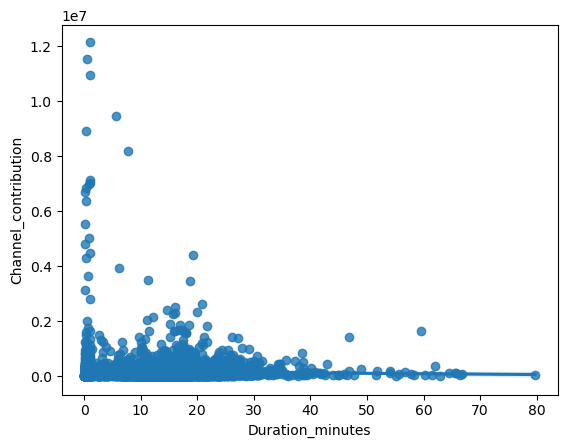

In [58]:
ax = sns.regplot(x="Duration_minutes", y="Channel_contribution", data=df_without_anomalies)

We can see in the visualization above that, As 'Duration_minutes' increases, 'Channel_contribution' tends to decrease or remain low. This could suggest that longer videos generally contribute less to the channel compared to shorter videos, or that viewer engagement decreases for longer content.


We will look at Channel Growth:
How does the 'View' count change over time?

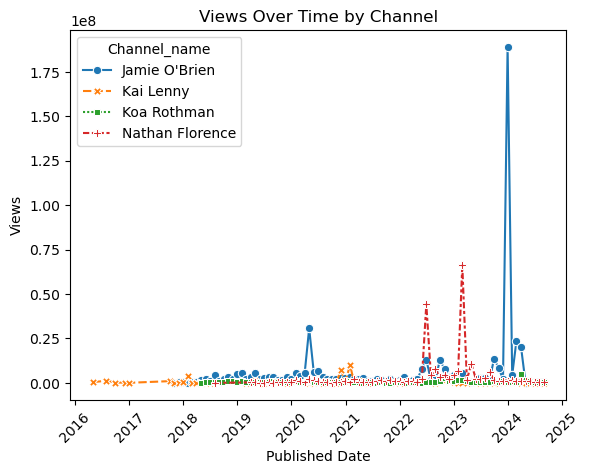

In [64]:
# Group by channel name and month, summing the views
groupedby_channels = df.groupby(['Channel_name', pd.Grouper(key='Published_date', freq='ME')])['Views'].sum().reset_index()

# Drop channels by filtering out unwanted ones
filtered_channels = groupedby_channels[~groupedby_channels['Channel_name'].isin
(['Italo Ferreira', 'Ho & Pringle Productions', 'Ben Gravy', 'John John Florence'])]
# Create the line plot
sns.lineplot(data=filtered_channels, x='Published_date', y='Views', hue='Channel_name', style='Channel_name', markers=True)

# Add labels and title
plt.xlabel('Published Date')
plt.ylabel('Views')
plt.title('Views Over Time by Channel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.show()


We can see that the "Jamie O'Brien" channel has a spike in the year 2024. 
Nathan Florence has spiked in the years 2023, 2024
let's see if it correlates with the timing of uploaded videos.

In [67]:
df.groupby('Channel_name')['Upload_gaps'].mean()

Channel_name
Ben Gravy                   2 days 20:02:49.914391485
Ho & Pringle Productions   14 days 08:24:10.630434782
Italo Ferreira             20 days 21:36:19.359756097
Jamie O'Brien               2 days 15:13:58.942408376
John John Florence            12 days 14:21:14.615625
Kai Lenny                  15 days 08:07:06.962121212
Koa Rothman                 4 days 12:45:19.823874755
Nathan Florence             4 days 04:41:20.822368421
Name: Upload_gaps, dtype: timedelta64[ns]

In [69]:
Jamie_df24 = df[(df['Channel_name']=="Jamie O'Brien") & (df['Published_date'].dt.year.isin([2020,2024]))].copy()
Jamie_df = df[df['Channel_name']=="Jamie O'Brien"].copy()
Nathan_df22_23 = df[(df['Channel_name']=="Nathan Florence") & (df['Published_date'].dt.year.isin([2022,2023]))].copy()
Nathan_df = df[df['Channel_name']=="Nathan Florence"].copy()
Kai_df21 = df[(df['Channel_name']=="Kai Lenny") & (df['Published_date'].dt.year.isin([2020,2021]))].copy()
Kai_df = df[df['Channel_name']=="Kai Lenny"].copy()

spike_df = pd.DataFrame({'Channel_name':["Jamie O'Brien", "Nathan Florence", "Kai Lenny"],
                         'Average_upload_gaps':[Jamie_df['Upload_gaps'].mean(),
                                                Nathan_df['Upload_gaps'].mean(),
                                                Kai_df['Upload_gaps'].mean()],
                         'Average_upload_gaps_high_view_years': [Jamie_df24['Upload_gaps'].mean(),
                                                Nathan_df22_23['Upload_gaps'].mean(),
                                                Kai_df21['Upload_gaps'].mean()]})
spike_df

,Channel_name,Average_upload_gaps,Average_upload_gaps_high_view_years
0,Jamie O'Brien,2 days 15:13:58.942408376,3 days 12:07:38.511627907
1,Nathan Florence,4 days 04:41:20.822368421,2 days 16:56:39.483271375
2,Kai Lenny,15 days 08:07:06.962121212,13 days 08:44:20.894736842


what can i infer from vthis? jamie uploaded less ging antisipation and nathan uploaded more and had channel growth. thee opposite oj jamies strategy


**Time-Series Analysis**

We will visualize how consistent uploading impacts the overall engagement trend.

In [77]:
# Calculate the mean days between uploads for each channel
channel_upload_frequency = df.groupby('Channel_name')['Upload_gaps'].mean().reset_index()

# Define a threshold for regular uploads
threshold = 7
channel_upload_frequency['Upload_frequency'] = channel_upload_frequency['Upload_gaps'].apply(
    lambda x: 'Regular' if x.days <= threshold else 'Irregular')

channel_upload_frequency

,Channel_name,Upload_gaps,Upload_frequency
0,Ben Gravy,2 days 20:02:49.914391485,Regular
1,Ho & Pringle Productions,14 days 08:24:10.630434782,Irregular
2,Italo Ferreira,20 days 21:36:19.359756097,Irregular
3,Jamie O'Brien,2 days 15:13:58.942408376,Regular
4,John John Florence,12 days 14:21:14.615625,Irregular
5,Kai Lenny,15 days 08:07:06.962121212,Irregular
6,Koa Rothman,4 days 12:45:19.823874755,Regular
7,Nathan Florence,4 days 04:41:20.822368421,Regular


We show how viewer engagement is impacted by the waiting period.

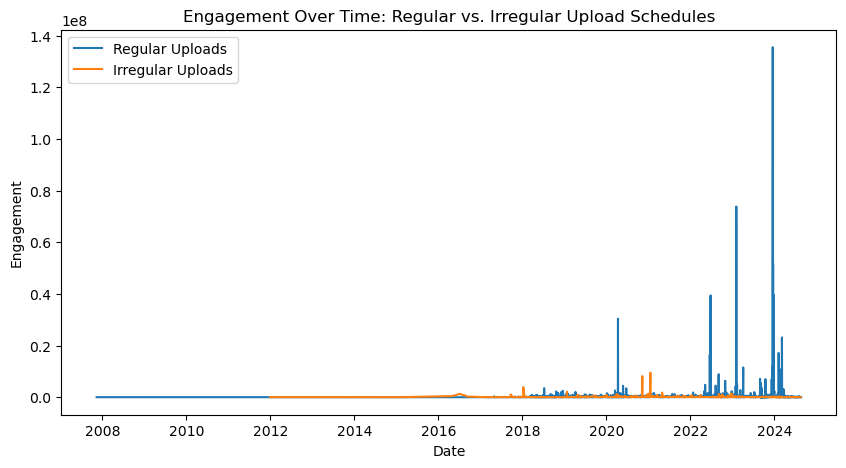

In [81]:
for index, row in channel_upload_frequency.iterrows():
    mask = (df['Channel_name'] == row['Channel_name'])
    df.loc[mask, 'Upload_frequency'] = row['Upload_frequency']

# Group data by upload frequency
regular_uploads = df[df['Upload_frequency'] == 'Regular']
irregular_uploads = df[df['Upload_frequency'] == 'Irregular']

# Plotting the engagement over time
plt.figure(figsize=(10, 5))

sns.lineplot(data=regular_uploads, x='Published_date', y='Channel_contribution', label='Regular Uploads')
sns.lineplot(data=irregular_uploads, x='Published_date', y='Channel_contribution', label='Irregular Uploads')

plt.title('Engagement Over Time: Regular vs. Irregular Upload Schedules')
plt.xlabel('Date')
plt.ylabel('Engagement')
plt.legend()
plt.show()


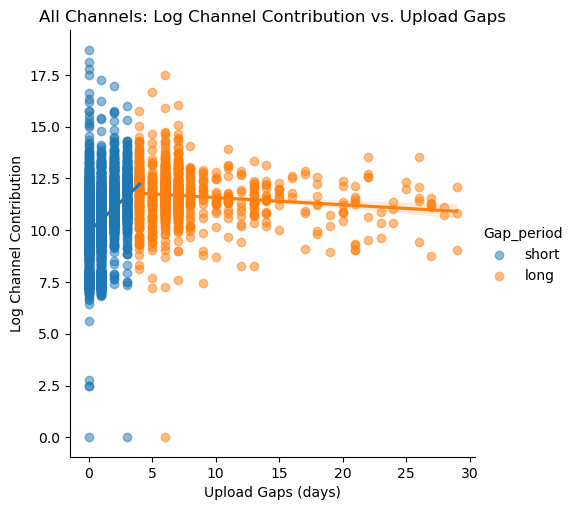

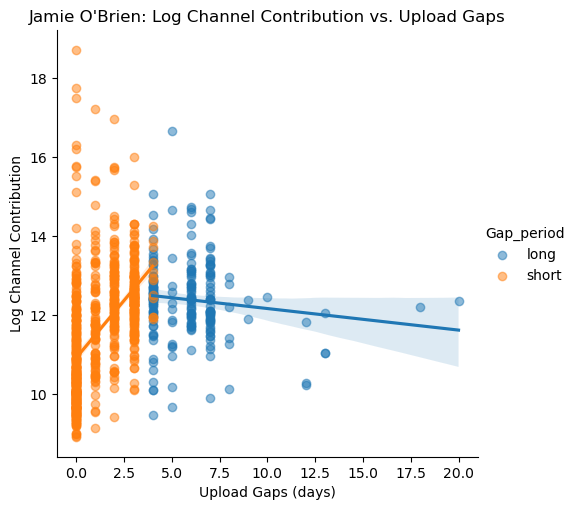

In [84]:
# Create a copy of the relevant columns
flt_df = df[['Channel_name', 'Channel_contribution', 'Upload_gaps']].copy()

# Classify upload gaps as 'short' or 'long'
flt_df['Gap_period'] = flt_df.apply(lambda x: 'short' if x['Upload_gaps'] <= pd.Timedelta(days=4) else 'long', axis=1)

# Convert 'Upload_gaps' to days
flt_df['Upload_gaps'] = flt_df['Upload_gaps'].dt.days
flt_df = flt_df[flt_df['Upload_gaps'] < 30]

# Apply logarithmic scale to 'Channel_contribution'
flt_df['Log_channel_contribution'] = np.log1p(flt_df['Channel_contribution'])

# Filter for Jamie O'Brien's data
Jamie_flt = flt_df[flt_df['Channel_name'] == "Jamie O'Brien"].copy()

# Plot for all data
sns.lmplot(x='Upload_gaps', y='Log_channel_contribution', hue='Gap_period', data=flt_df, scatter_kws={'alpha': 0.5})
plt.title("All Channels: Log Channel Contribution vs. Upload Gaps")
plt.xlabel("Upload Gaps (days)")
plt.ylabel("Log Channel Contribution")
plt.show()

# Plot for Jamie O'Brien's data
sns.lmplot(x='Upload_gaps', y='Log_channel_contribution', hue='Gap_period', data=Jamie_flt, scatter_kws={'alpha': 0.5})
plt.title("Jamie O'Brien: Log Channel Contribution vs. Upload Gaps")
plt.xlabel("Upload Gaps (days)")
plt.ylabel("Log Channel Contribution")
plt.show()

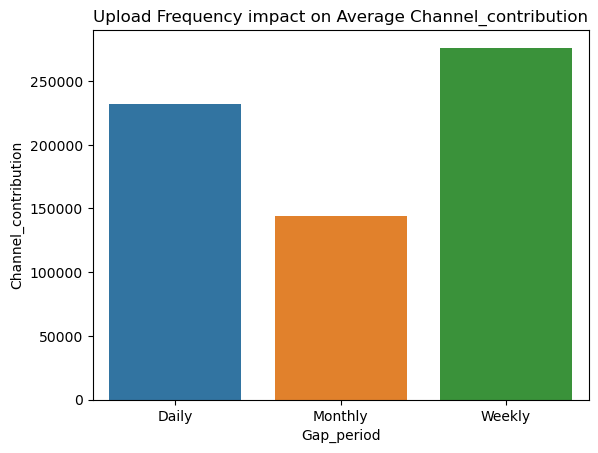

In [85]:
# Create a copy of the relevant columns
flt_df = df[['Channel_contribution', 'Upload_gaps']].copy()

# Convert 'Upload_gaps' to days
flt_df['Upload_gaps'] = flt_df['Upload_gaps'].dt.days
flt_df = flt_df[flt_df['Upload_gaps']<60]

# Classify upload gaps as 'Daily', 'Weekly', or 'Monthly'
flt_df['Gap_period'] = flt_df.apply(lambda x: 'Daily' if x['Upload_gaps'] <= 4 else 'Weekly' if x['Upload_gaps'] <= 9 else 'Monthly', axis=1)

# Apply logarithmic scale to 'Channel_contribution' (optional, if you still want to use it)
flt_df['Log_channel_contribution'] = np.log1p(flt_df['Channel_contribution'])

# Calculate the average contribution for each Gap_period
average_contribution = flt_df.groupby('Gap_period')['Channel_contribution'].mean().reset_index()

sns.barplot(data=average_contribution, x='Gap_period', y='Channel_contribution', hue='Gap_period')
plt.title('Upload Frequency impact on Average Channel_contribution')
plt.show()

Consistency Matters: Visualizations suggest maintaining short upload intervals positively contributes to channel growth.
Impact of Long Gaps: Extended periods between uploads generally lead to reduced engagement and contribution, emphasizing the importance of consistent content release schedules for sustaining or growing channel metrics.

## Conclusion and Recommendations
### Summary of Findings
**Video Upload Timing:**

The timing of video uploads has a noticeable impact on viewer engagement. Videos uploaded during specific times of the day (morning, afternoon, evening) show different levels of engagement. 
Furthermore, The analysis reveals that certain days of the week may be more favorable for uploading videos, leading to higher Channel contribution. This indicates that strategic timing aligned with audience behavior can enhance engagement.

**Impact of Video Duration:**

There is a tendency for longer videos to contribute less to channel engagement metrics (Channel_contribution), which combines views, likes, and comments. This suggests that shorter videos may be more engaging or easier for viewers to consume.

**Growth Trends:**

Channels like "Jamie O'Brien" and "Nathan Florence" showed significant growth in views over time, with clear spikes during specific periods, suggesting a correlation between upload consistency and channel growth.

**Upload Gaps and Engagement:**

Larger upload gaps were associated with lower Channel growth, indicating that a longer waiting period between uploads will minimize viewer engagement.
when we view the correlation between "viewer engagement over time" and "frequency of uploads" it is clear that consistent and short upload gaps are key for channel growth.

**Comparative Analysis Across Channels:**

When comparing multiple channels, differences in upload timing, frequency, and video length all contributed to varying levels of success in terms of views and overall channel contribution.

### Future Steps
**Further Research**:

**Expanding the analysis** to niches that cover a broad range of interests and content areas that could provide valuable insights.

**Explore other variables that might impact viewer engagement and channel growth** 

Potential factors include:

Video Thumbnails: Analyze how different styles of thumbnails affect click-through rates and engagement.

Social Media Promotion: Assess how promoting videos on social media platforms influences engagement metrics.



### Recommendations:
**Optimizing Upload Timing**: Utilize insights from the analysis to create an optimal upload schedule tailored to the specific audience's active times.

**Consistency**: Establish and maintain a regular upload schedule to build audience expectations and loyalty.

**Frequency**: Determine the ideal frequency of uploads to balance engagement without overwhelming the audience.

### Final Thoughts
This project demonstrates the impact of upload timing on YouTube channel engagement and provides actionable insights for content creators.
